In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [7]:
user= pd.read_csv("/content/drive/MyDrive/ds assignment/user-interactions.csv")

In [9]:
meta = pd.read_csv("/content/drive/MyDrive/ds assignment/metadata.csv")

In [10]:
meta.head()

,author_id,pratilipi_id,category_name,reading_time,updated_at,published_at
0,-3418949279741297,1025741862639304,translation,0,2020-08-19 15:26:13,2016-09-30 10:37:04
1,-2270332351871840,1377786215601277,translation,171,2021-01-21 16:27:07,2018-06-11 13:17:48
2,-2270332352037261,1377786215601962,translation,92,2020-09-29 12:33:57,2018-06-12 04:19:12
3,-2270332352521845,1377786215640994,translation,0,2019-10-17 09:03:37,2019-09-26 14:58:53
4,-2270332349665658,1377786215931338,translation,47,2020-05-05 11:33:41,2018-11-25 12:28:23


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
user.head()

,Unnamed: 0,user_id,pratilipi_id,read_percent,updated_at
0,0,5506791963854965,1377786220672965,100.0,2022-03-23 00:08:26.227
1,1,5506791979071996,1377786219742624,29.0,2022-03-23 00:08:26.220
2,2,5506791980256358,1377786217096334,22.0,2022-03-23 00:08:26.020
3,3,5506791988747277,1377786224767880,100.0,2022-03-23 00:08:25.306
4,4,5506791992372558,1377786218111595,100.0,2022-03-23 00:08:25.250


In [13]:
user.shape,meta.shape

((10000000, 5), (954501, 6))

In [14]:
user.columns,meta.columns

(Index(['Unnamed: 0', 'user_id', 'pratilipi_id', 'read_percent', 'updated_at'], dtype='object'),
 Index(['author_id', 'pratilipi_id', 'category_name', 'reading_time',
        'updated_at', 'published_at'],
       dtype='object'))

## Visualization 


In [15]:

meta["category_name"].value_counts()

romance                      193220
shortstories                 102097
social                        73920
suspense                      64041
family                        58515
novels                        53584
life                          51356
moral-inspiring               47421
women                         37168
horror                        28506
entertainment                 23362
action-and-adventure          21589
experiences-and-memories      20276
webseries                     16227
relegion-and-spiritual        15476
comedy                        14893
Pratilipi-kalamkar-samman     13237
mythology                     12324
children                      10196
Indiawale                      9674
Pratilipi-Awards-Hindi         9342
fantasy                        9324
swahindi2                      7853
drama                          7387
crime                          7151
politics                       5810
translation                    4250
short-story-challenge       

In [16]:
meta["category_name"] =meta["category_name"].str.replace('-','')

In [17]:

plt.rcParams["figure.figsize"] = (30,30)

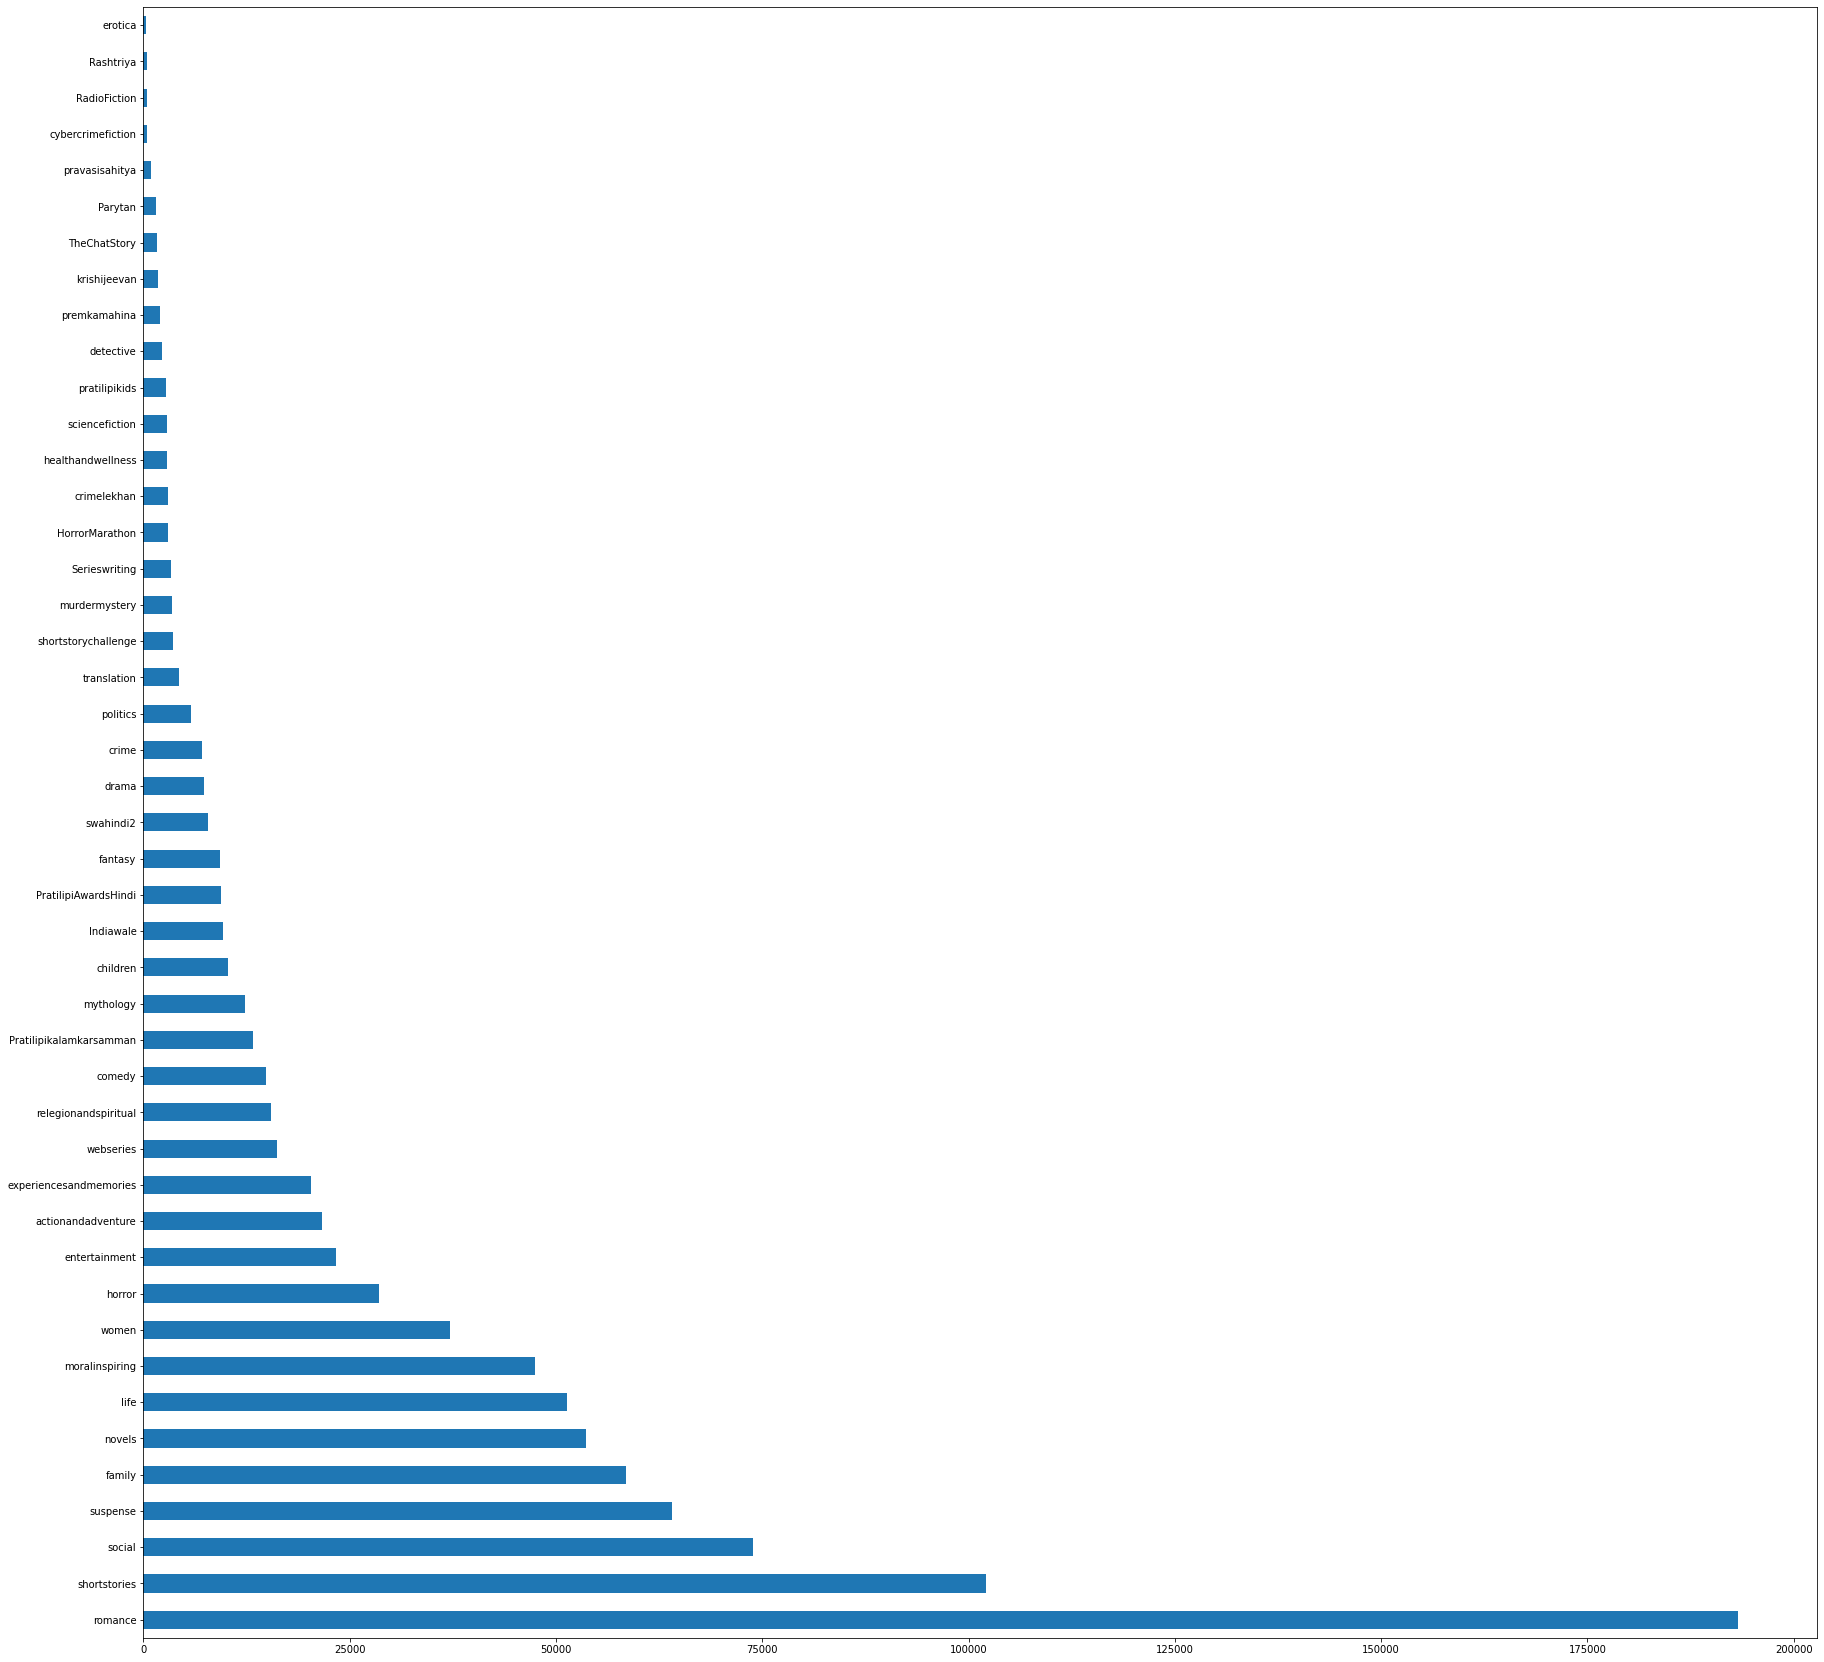

In [18]:
meta["category_name"].value_counts().plot(kind='barh')

In [19]:
# one story with multiple id's
meta.duplicated(['pratilipi_id']).sum()


467808

## Check distribution of reading time across data

In [20]:
meta.head()

,author_id,pratilipi_id,category_name,reading_time,updated_at,published_at
0,-3418949279741297,1025741862639304,translation,0,2020-08-19 15:26:13,2016-09-30 10:37:04
1,-2270332351871840,1377786215601277,translation,171,2021-01-21 16:27:07,2018-06-11 13:17:48
2,-2270332352037261,1377786215601962,translation,92,2020-09-29 12:33:57,2018-06-12 04:19:12
3,-2270332352521845,1377786215640994,translation,0,2019-10-17 09:03:37,2019-09-26 14:58:53
4,-2270332349665658,1377786215931338,translation,47,2020-05-05 11:33:41,2018-11-25 12:28:23


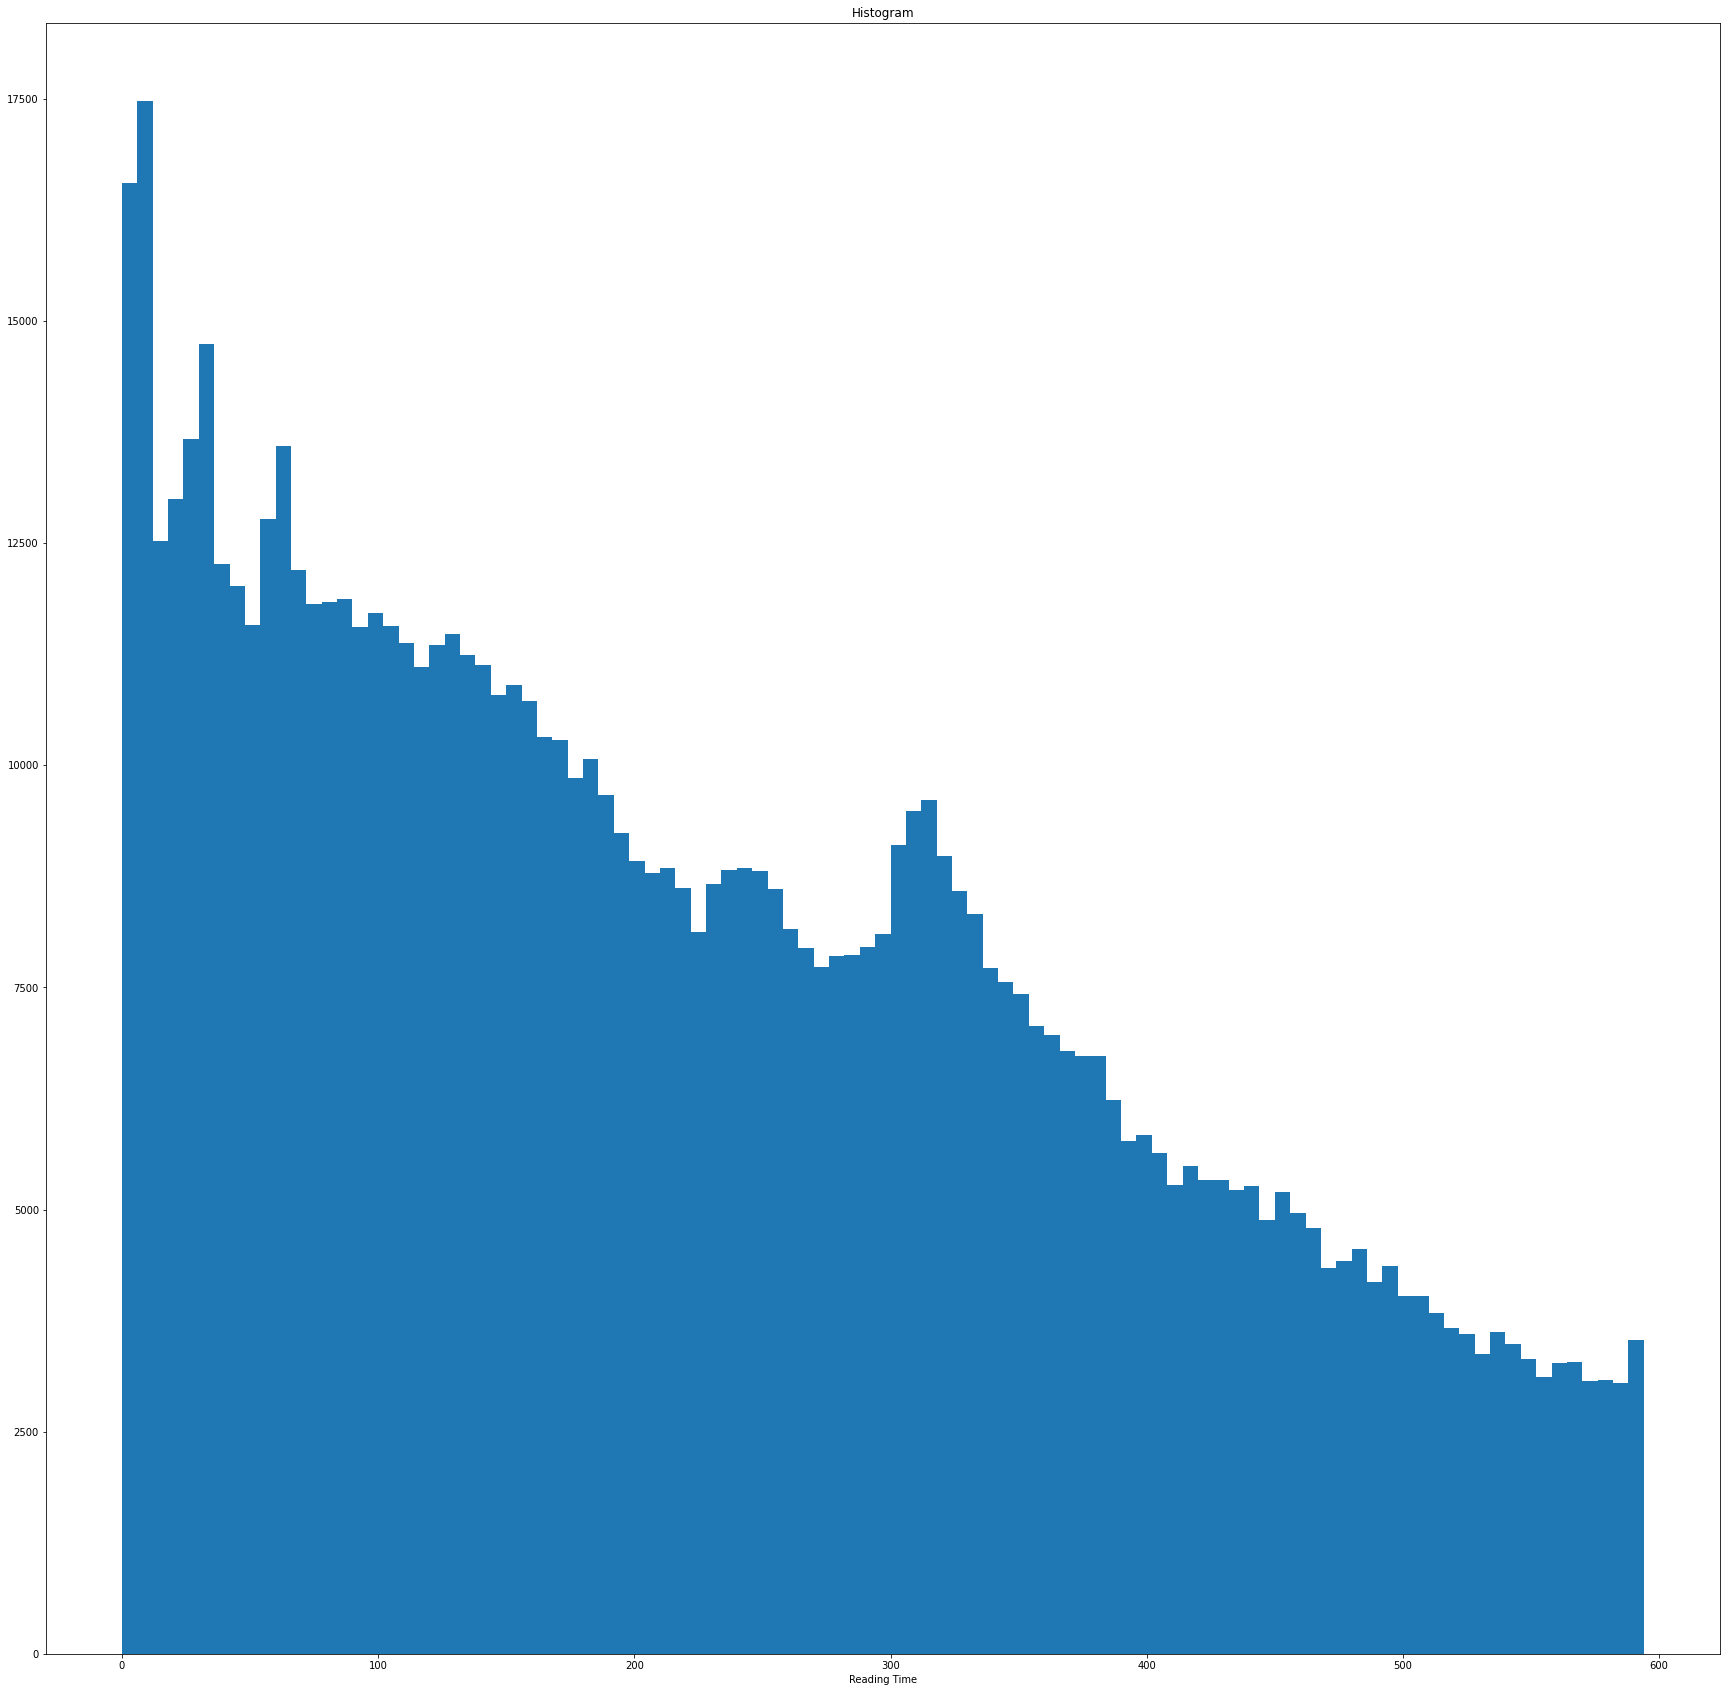

In [21]:
# distribution of reading time
x =meta["reading_time"]
plt.hist(x, bins=[6*x for x in range(100)])
plt.gca().set(title='Histogram',xlabel="Reading Time");

In [22]:
def inter_quartile_range(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
 
    print(f"IQR value for column is:" ,(IQR))
     
    lower = Q1 - 1.5 * IQR
    upper= Q3 + 1.5 * IQR
    if lower<0:
        lower= 0
    print("IQR range for column is:",(lower, upper))

In [23]:
inter_quartile_range(meta, col="reading_time")

IQR value for column is: 350.0
IQR range for column is: (0, 986.0)


In [24]:
meta["reading_time"].min(),meta["reading_time"].max()

(0, 78983)

In [25]:
len(meta[meta["reading_time"]>986])

44710

In [26]:
len(meta[meta["reading_time"]<=0])

4055

There are 44710 outliers according to IQR and 4055 people with reading time less than 0

## Check distribution of reading percent across data

In [27]:
user.head()

,Unnamed: 0,user_id,pratilipi_id,read_percent,updated_at
0,0,5506791963854965,1377786220672965,100.0,2022-03-23 00:08:26.227
1,1,5506791979071996,1377786219742624,29.0,2022-03-23 00:08:26.220
2,2,5506791980256358,1377786217096334,22.0,2022-03-23 00:08:26.020
3,3,5506791988747277,1377786224767880,100.0,2022-03-23 00:08:25.306
4,4,5506791992372558,1377786218111595,100.0,2022-03-23 00:08:25.250


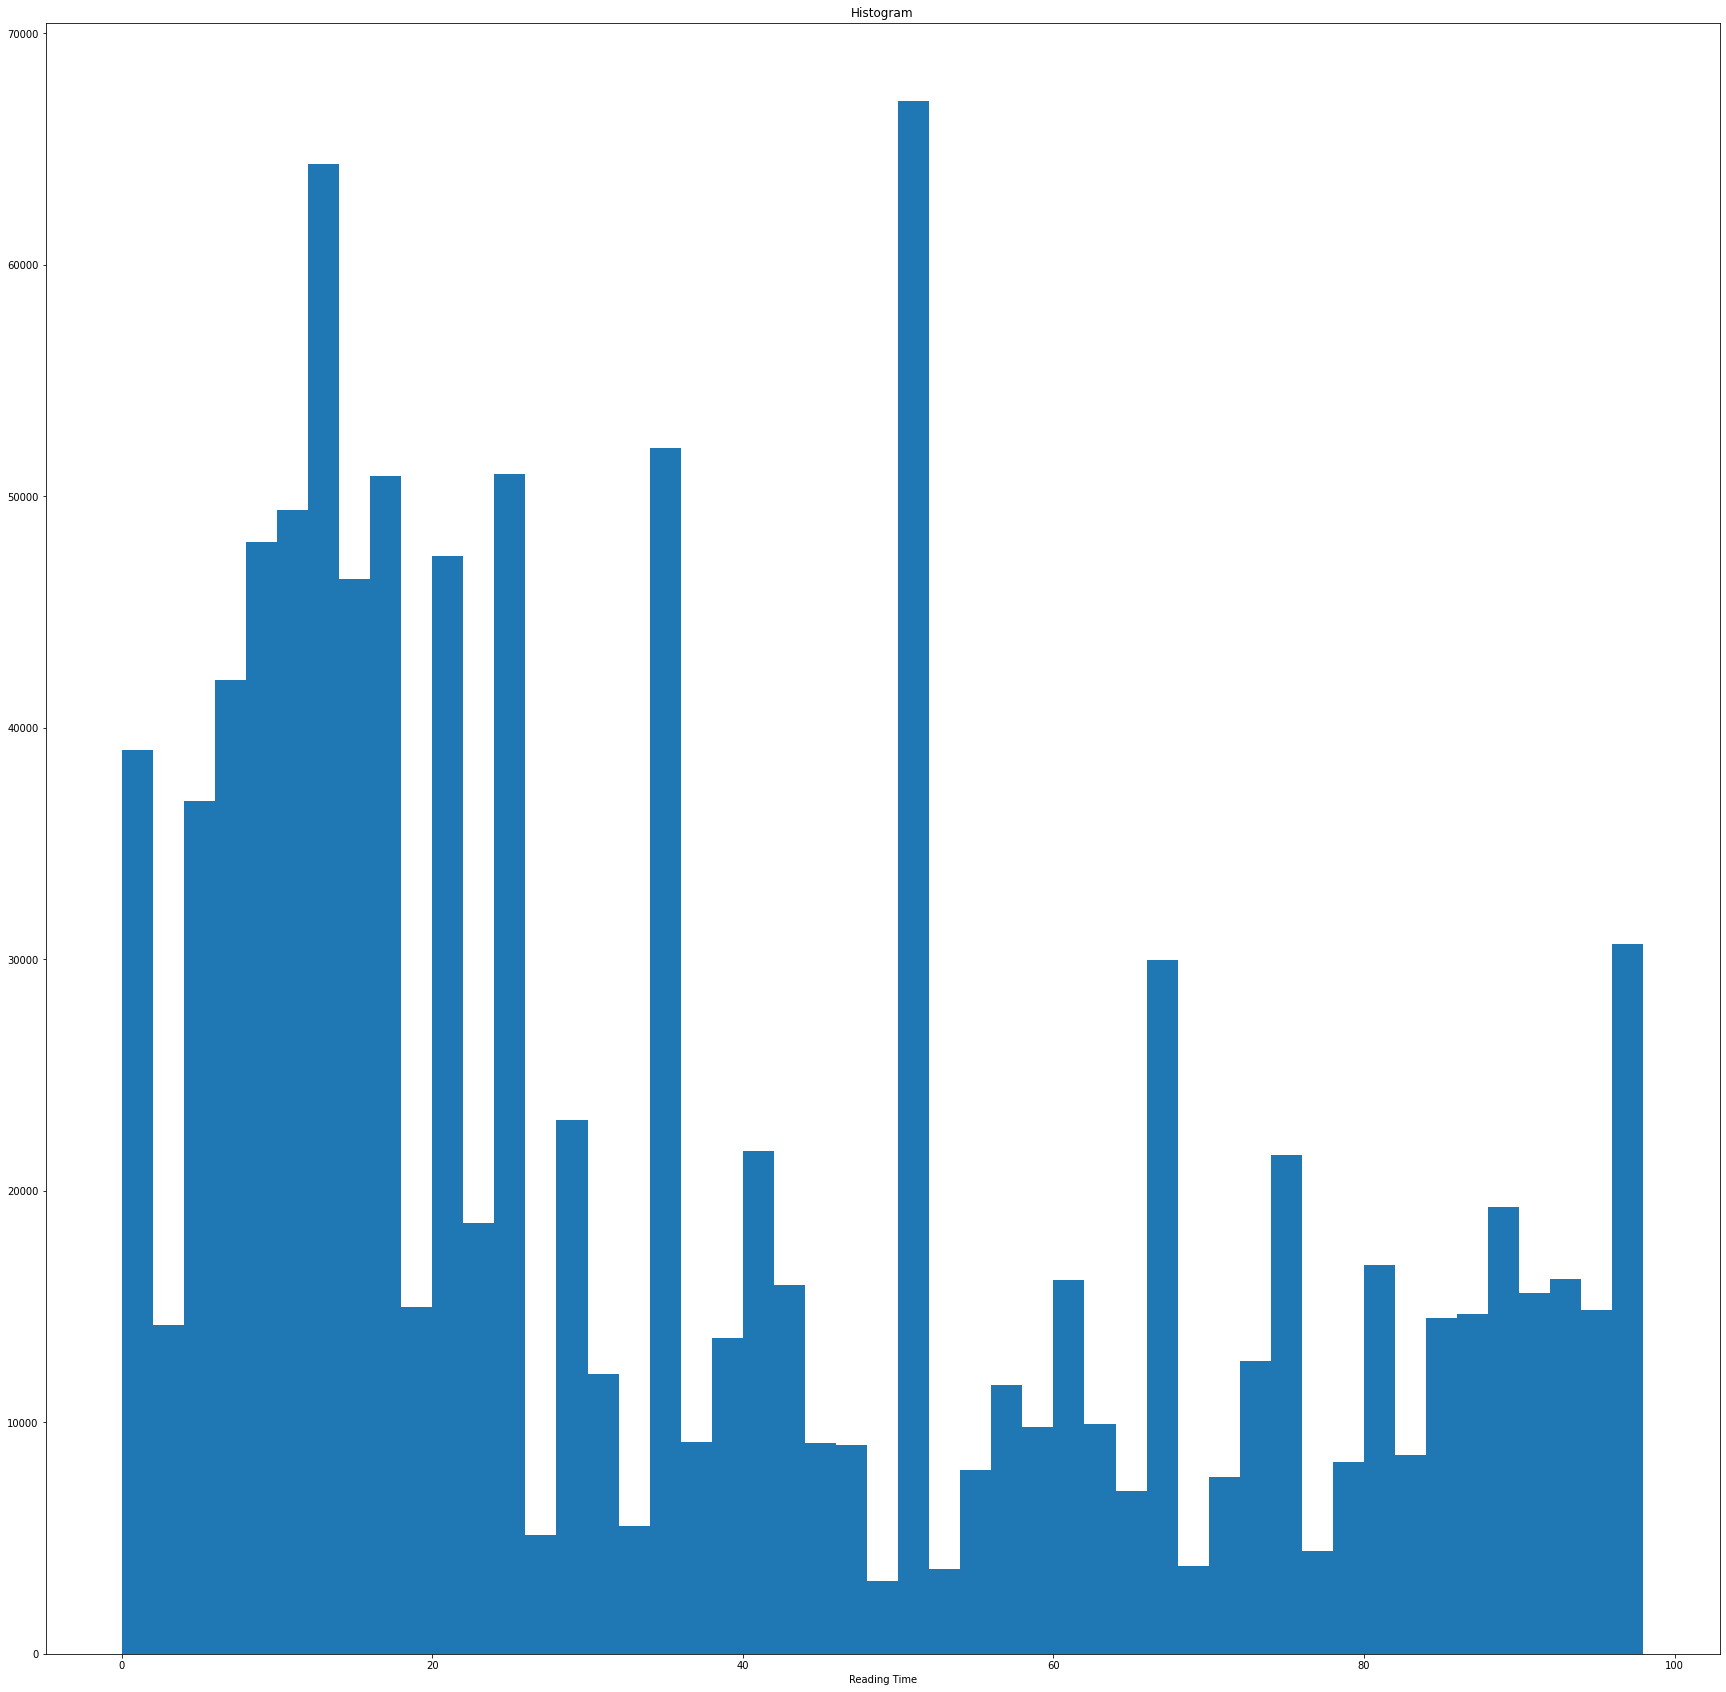

In [28]:
x =user["read_percent"]
plt.hist(x, bins= [2*x for x in range(50)])
plt.gca().set(title='Histogram',xlabel="Reading Time");

In [29]:
len(user[user["read_percent"]>100])

139

##### Read percent greater than 100 indicated technical glitch

In [30]:
len(user[user["read_percent"]==0])

37773

##### Read percent zero indicates glitch or due to abrupt open and close

## Distribution of date across updated at in interaction data and published at in metadata

In [31]:
user.columns

Index(['Unnamed: 0', 'user_id', 'pratilipi_id', 'read_percent', 'updated_at'], dtype='object')

In [32]:
user['updated_at'].max(),user['updated_at'].min()

('2022-03-23 00:08:26.227', '2022-03-18 15:14:41.771')

In [33]:
user['updated_at'].dtype

dtype('O')

In [34]:
user['updated_at'] = user['updated_at'].astype("datetime64")

In [35]:
user['updated_at'].dtype

dtype('<M8[ns]')

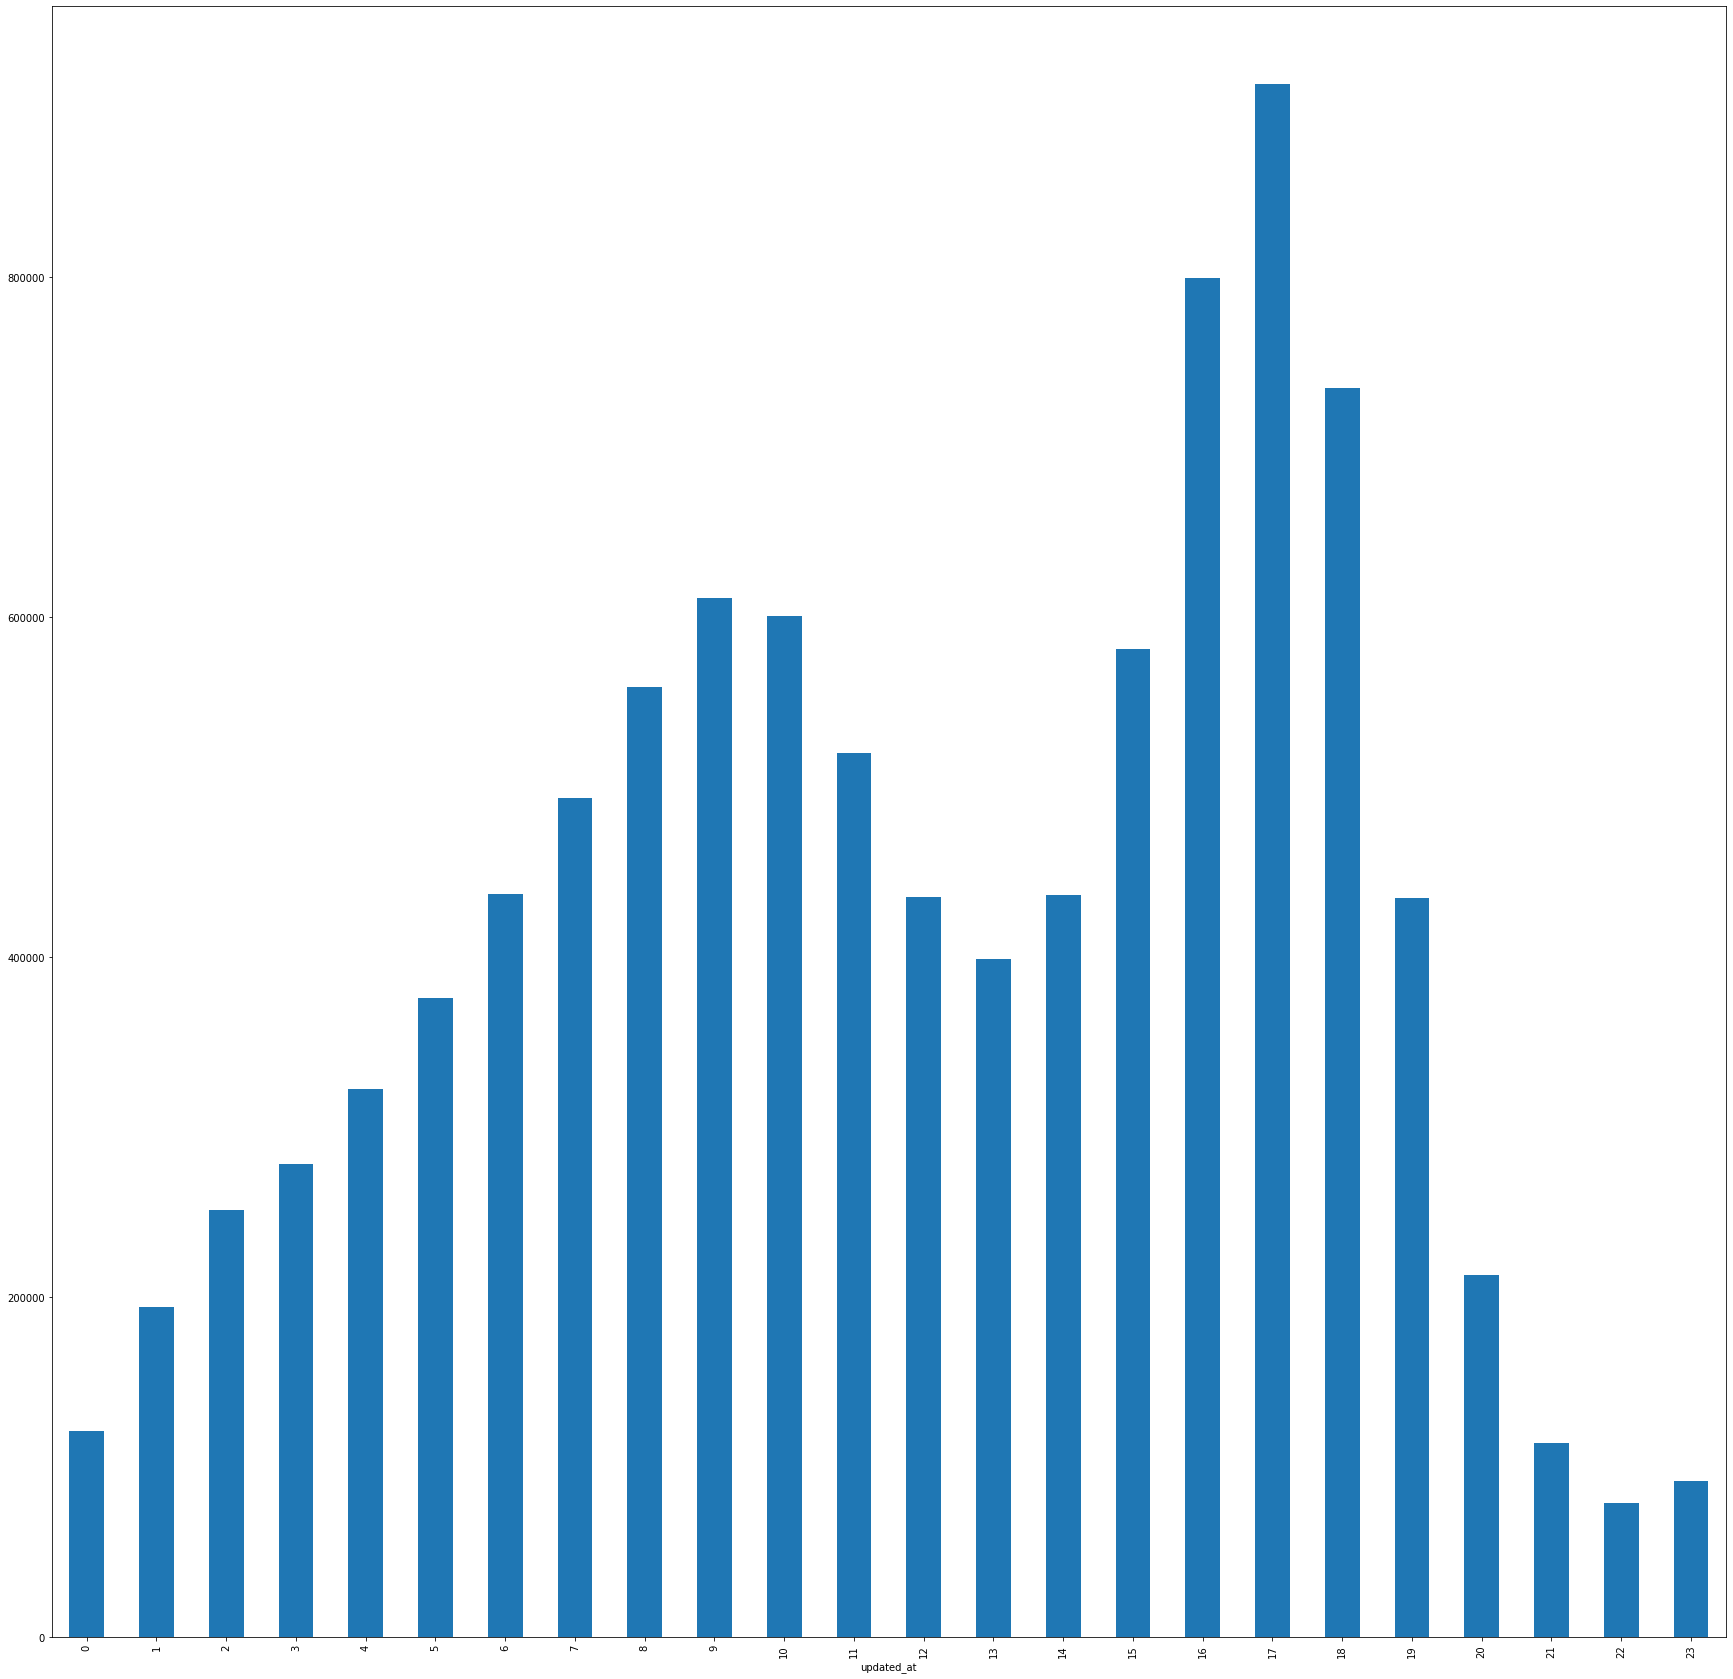

In [36]:
user["updated_at"].groupby(user["updated_at"].dt.hour).count().plot(kind="bar")

 3pm to 7pm is the peak time

## EDA summary

In [37]:
user.head()

,Unnamed: 0,user_id,pratilipi_id,read_percent,updated_at
0,0,5506791963854965,1377786220672965,100.0,2022-03-23 00:08:26.227
1,1,5506791979071996,1377786219742624,29.0,2022-03-23 00:08:26.220
2,2,5506791980256358,1377786217096334,22.0,2022-03-23 00:08:26.020
3,3,5506791988747277,1377786224767880,100.0,2022-03-23 00:08:25.306
4,4,5506791992372558,1377786218111595,100.0,2022-03-23 00:08:25.250


In [38]:
meta.head()

,author_id,pratilipi_id,category_name,reading_time,updated_at,published_at
0,-3418949279741297,1025741862639304,translation,0,2020-08-19 15:26:13,2016-09-30 10:37:04
1,-2270332351871840,1377786215601277,translation,171,2021-01-21 16:27:07,2018-06-11 13:17:48
2,-2270332352037261,1377786215601962,translation,92,2020-09-29 12:33:57,2018-06-12 04:19:12
3,-2270332352521845,1377786215640994,translation,0,2019-10-17 09:03:37,2019-09-26 14:58:53
4,-2270332349665658,1377786215931338,translation,47,2020-05-05 11:33:41,2018-11-25 12:28:23


## Feature Engineering,Data cleaning

In [39]:
## converting >100 percent to 100
user['read_percent'] = user['read_percent'].apply(lambda x: x if x<=100 else 100)

In [40]:
len(user[user["read_percent"]>100])
#

0

#### We will also remove interaction of those users having less than 20 interaction. 
* It will be hard to recommend to new users in collobrative system so not including <10 interactions

In [41]:
countd = user.groupby('user_id').count()

In [42]:
countd.head()

,Unnamed: 0,pratilipi_id,read_percent,updated_at
user_id,,,,
3255387601412772,2,2,2,2
3256456725308068,1,1,1,1
3257398541066916,8,8,8,8
3257552805995172,30,30,30,30
3257621147984548,5,5,5,5


In [43]:
user = user.loc[user['user_id'].isin(countd[countd['pratilipi_id'] > 10].index)].reset_index(drop = True)

In [44]:
user.shape

(9305120, 5)

In [45]:
# Number of duplicates left after droping in pratilipi are 486693
len(meta.drop_duplicates(subset = ["pratilipi_id"]))

486693

In [46]:
dict1 = {'category_name':lambda x: list(x), 
     'updated_at':'max',
     'published_at' : 'min',
     "reading_time" : "mean"
    }

meta = meta.groupby(['author_id', 'pratilipi_id']).agg(dict1).reset_index()

In [47]:
meta.head()

,author_id,pratilipi_id,category_name,updated_at,published_at,reading_time
0,-9070332352853360,312572401325768,"[novels, politics, social]",2018-12-03 01:57:32,2017-12-04 18:08:16,0.0
1,-9070332352853358,-96530313603384,[horror],2018-08-17 10:28:18,2017-12-04 19:11:01,0.0
2,-4566636240762225,1377786218853788,"[novels, romance, suspense]",2022-01-17 18:04:49,2020-04-27 09:31:23,81.0
3,-4566636240762225,1377786218889274,"[novels, romance, suspense]",2020-05-05 18:02:26,2020-05-05 18:02:26,112.0
4,-4566636240762225,1377786224904125,"[detective, romance, murdermystery]",2021-07-28 15:23:45,2021-07-28 14:14:45,262.0


In [48]:
meta.shape

(486693, 6)

In [49]:
# Changing to positive value
meta["pratilipi_id"] = meta.apply(lambda x : abs(x["pratilipi_id"]),axis = 1)

In [50]:
meta["author_id"] = meta.apply(lambda x : abs(x["author_id"]),axis = 1)

In [51]:
# Converting ids have no effect on dataset
len(meta.drop_duplicates(subset=["author_id","pratilipi_id"]))

486693

In [52]:
meta.head()

,author_id,pratilipi_id,category_name,updated_at,published_at,reading_time
0,9070332352853360,312572401325768,"[novels, politics, social]",2018-12-03 01:57:32,2017-12-04 18:08:16,0.0
1,9070332352853358,96530313603384,[horror],2018-08-17 10:28:18,2017-12-04 19:11:01,0.0
2,4566636240762225,1377786218853788,"[novels, romance, suspense]",2022-01-17 18:04:49,2020-04-27 09:31:23,81.0
3,4566636240762225,1377786218889274,"[novels, romance, suspense]",2020-05-05 18:02:26,2020-05-05 18:02:26,112.0
4,4566636240762225,1377786224904125,"[detective, romance, murdermystery]",2021-07-28 15:23:45,2021-07-28 14:14:45,262.0


In [53]:
meta["published_at"]=meta["published_at"].astype("datetime64")

In [54]:
meta["month"] = meta["published_at"].dt.month

In [55]:
meta["year"] = meta["published_at"].dt.year

In [56]:
meta.head()

,author_id,pratilipi_id,category_name,updated_at,published_at,reading_time,month,year
0,9070332352853360,312572401325768,"[novels, politics, social]",2018-12-03 01:57:32,2017-12-04 18:08:16,0.0,12.0,2017.0
1,9070332352853358,96530313603384,[horror],2018-08-17 10:28:18,2017-12-04 19:11:01,0.0,12.0,2017.0
2,4566636240762225,1377786218853788,"[novels, romance, suspense]",2022-01-17 18:04:49,2020-04-27 09:31:23,81.0,4.0,2020.0
3,4566636240762225,1377786218889274,"[novels, romance, suspense]",2020-05-05 18:02:26,2020-05-05 18:02:26,112.0,5.0,2020.0
4,4566636240762225,1377786224904125,"[detective, romance, murdermystery]",2021-07-28 15:23:45,2021-07-28 14:14:45,262.0,7.0,2021.0


In [57]:
#converting to minutes
meta['reading_time_min'] = meta['reading_time'].apply(lambda x: int(x/60))

In [58]:
meta.head()

,author_id,pratilipi_id,category_name,updated_at,published_at,reading_time,month,year,reading_time_min
0,9070332352853360,312572401325768,"[novels, politics, social]",2018-12-03 01:57:32,2017-12-04 18:08:16,0.0,12.0,2017.0,0
1,9070332352853358,96530313603384,[horror],2018-08-17 10:28:18,2017-12-04 19:11:01,0.0,12.0,2017.0,0
2,4566636240762225,1377786218853788,"[novels, romance, suspense]",2022-01-17 18:04:49,2020-04-27 09:31:23,81.0,4.0,2020.0,1
3,4566636240762225,1377786218889274,"[novels, romance, suspense]",2020-05-05 18:02:26,2020-05-05 18:02:26,112.0,5.0,2020.0,1
4,4566636240762225,1377786224904125,"[detective, romance, murdermystery]",2021-07-28 15:23:45,2021-07-28 14:14:45,262.0,7.0,2021.0,4


In [59]:
# Remove all stories published after the minimum intereaction datetime so that recommendation is evaluated fairly
user["updated_at"].min()

Timestamp('2022-03-18 15:14:41.771000')

In [60]:
meta.shape

(486693, 9)

In [61]:
meta = meta[meta["published_at"]<user["updated_at"].min()].reset_index(drop = True)

In [62]:
meta.shape

(482321, 9)

In [63]:
user.shape

(9305120, 5)

In [64]:
user = user[user["pratilipi_id"].isin(meta["pratilipi_id"].unique())].reset_index(drop = True)

In [65]:
# Remove interactions with record of their metadata 
user.shape

(5338637, 5)

In [66]:
meta.head()

,author_id,pratilipi_id,category_name,updated_at,published_at,reading_time,month,year,reading_time_min
0,9070332352853360,312572401325768,"[novels, politics, social]",2018-12-03 01:57:32,2017-12-04 18:08:16,0.0,12.0,2017.0,0
1,9070332352853358,96530313603384,[horror],2018-08-17 10:28:18,2017-12-04 19:11:01,0.0,12.0,2017.0,0
2,4566636240762225,1377786218853788,"[novels, romance, suspense]",2022-01-17 18:04:49,2020-04-27 09:31:23,81.0,4.0,2020.0,1
3,4566636240762225,1377786218889274,"[novels, romance, suspense]",2020-05-05 18:02:26,2020-05-05 18:02:26,112.0,5.0,2020.0,1
4,4566636240762225,1377786224904125,"[detective, romance, murdermystery]",2021-07-28 15:23:45,2021-07-28 14:14:45,262.0,7.0,2021.0,4


In [67]:

meta.drop(["updated_at","published_at","author_id","reading_time"],axis = 1,inplace = True)

In [68]:
meta.head()

,pratilipi_id,category_name,month,year,reading_time_min
0,312572401325768,"[novels, politics, social]",12.0,2017.0,0
1,96530313603384,[horror],12.0,2017.0,0
2,1377786218853788,"[novels, romance, suspense]",4.0,2020.0,1
3,1377786218889274,"[novels, romance, suspense]",5.0,2020.0,1
4,1377786224904125,"[detective, romance, murdermystery]",7.0,2021.0,4


In [69]:
meta.columns

Index(['pratilipi_id', 'category_name', 'month', 'year', 'reading_time_min'], dtype='object')

In [70]:
user.head()

,Unnamed: 0,user_id,pratilipi_id,read_percent,updated_at
0,0,5506791963854965,1377786220672965,100.0,2022-03-23 00:08:26.227
1,4,5506791992372558,1377786218111595,100.0,2022-03-23 00:08:25.250
2,11,5506791958041994,1377786225711380,100.0,2022-03-23 00:08:21.954
3,13,5506791978198543,1377786220930983,100.0,2022-03-23 00:08:20.095
4,14,5506791975873682,1377786225752249,100.0,2022-03-23 00:08:19.906


In [71]:
df = user.merge(meta, on = 'pratilipi_id',how = 'left')
df

,Unnamed: 0,user_id,pratilipi_id,read_percent,updated_at,category_name,month,year,reading_time_min
0,0,5506791963854965,1377786220672965,100.0,2022-03-23 00:08:26.227,"[novels, romance, moralinspiring]",8.0,2020.0,5
1,4,5506791992372558,1377786218111595,100.0,2022-03-23 00:08:25.250,"[novels, romance, suspense]",2.0,2020.0,29
2,11,5506791958041994,1377786225711380,100.0,2022-03-23 00:08:21.954,"[family, romance]",9.0,2021.0,3
3,13,5506791978198543,1377786220930983,100.0,2022-03-23 00:08:20.095,"[romance, suspense]",9.0,2020.0,11
4,14,5506791975873682,1377786225752249,100.0,2022-03-23 00:08:19.906,"[novels, PratilipiAwardsHindi, romance]",9.0,2021.0,7
...,...,...,...,...,...,...,...,...,...
5338632,9999990,5506791979182708,1377786218415632,100.0,2022-03-18 15:14:42.134,"[novels, romance]",3.0,2020.0,26
5338633,9999991,5506791950653936,1377786215559645,75.0,2022-03-18 15:14:42.122,"[family, moralinspiring, shortstories]",5.0,2018.0,1
5338634,9999992,5506791980439899,1377786228150074,100.0,2022-03-18 15:14:42.120,"[family, romance, suspense]",3.0,2022.0,17
5338635,9999994,5506791972010795,1377786228217647,99.0,2022-03-18 15:14:42.081,"[drama, suspense, swahindi2]",3.0,2022.0,6


In [72]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [73]:
df

,user_id,pratilipi_id,read_percent,updated_at,category_name,month,year,reading_time_min
0,5506791963854965,1377786220672965,100.0,2022-03-23 00:08:26.227,"[novels, romance, moralinspiring]",8.0,2020.0,5
1,5506791992372558,1377786218111595,100.0,2022-03-23 00:08:25.250,"[novels, romance, suspense]",2.0,2020.0,29
2,5506791958041994,1377786225711380,100.0,2022-03-23 00:08:21.954,"[family, romance]",9.0,2021.0,3
3,5506791978198543,1377786220930983,100.0,2022-03-23 00:08:20.095,"[romance, suspense]",9.0,2020.0,11
4,5506791975873682,1377786225752249,100.0,2022-03-23 00:08:19.906,"[novels, PratilipiAwardsHindi, romance]",9.0,2021.0,7
...,...,...,...,...,...,...,...,...
5338632,5506791979182708,1377786218415632,100.0,2022-03-18 15:14:42.134,"[novels, romance]",3.0,2020.0,26
5338633,5506791950653936,1377786215559645,75.0,2022-03-18 15:14:42.122,"[family, moralinspiring, shortstories]",5.0,2018.0,1
5338634,5506791980439899,1377786228150074,100.0,2022-03-18 15:14:42.120,"[family, romance, suspense]",3.0,2022.0,17
5338635,5506791972010795,1377786228217647,99.0,2022-03-18 15:14:42.081,"[drama, suspense, swahindi2]",3.0,2022.0,6


In [74]:
#function to build entire feature set and merging both dataset
def create_feature_set(meta,user):
    """ 
    Process df to create a final set of features that will be used to generate recommendations

    Parameters: 
        df (pandas dataframe): Dataframe
        float_cols (list(str)): List of float columns that will be scaled 
        
    Returns: 
        final: final set of features 
    """
    df = user.merge(meta, on = 'pratilipi_id',how = 'left')
    tfidf = TfidfVectorizer()
    tfidf_matrix =  tfidf.fit_transform(df['category_name'].apply(lambda x: ",".join(x)))
    genre_df = pd.DataFrame(tfidf_matrix.toarray())
    genre_df.columns =  [i for i in tfidf.get_feature_names()]
    genre_df.reset_index(drop = True, inplace=True)
    #concanenate all features
    final = pd.concat([df,genre_df], axis = 1)
    final.drop(["category_name"],axis =1,inplace = True)
    print(genre_df.columns)
    return final

In [75]:
final = create_feature_set(meta,user)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Index(['actionandadventure', 'children', 'comedy', 'crime', 'crimelekhan',
       'cybercrimefiction', 'detective', 'drama', 'entertainment', 'erotica',
       'experiencesandmemories', 'family', 'fantasy', 'healthandwellness',
       'horror', 'horrormarathon', 'indiawale', 'krishijeevan', 'life',
       'moralinspiring', 'murdermystery', 'mythology', 'novels', 'parytan',
       'politics', 'pratilipiawardshindi', 'pratilipikalamkarsamman',
       'pratilipikids', 'pravasisahitya', 'premkamahina', 'radiofiction',
       'rashtriya', 'relegionandspiritual', 'romance', 'sciencefiction',
       'serieswriting', 'shortstories', 'shortstorychallenge', 'social',
       'suspense', 'swahindi2', 'thechatstory', 'translation', 'webseries',
       'women'],
      dtype='object')


In [76]:
final.head()

,Unnamed: 0,user_id,pratilipi_id,read_percent,updated_at,month,year,reading_time_min,actionandadventure,children,...,serieswriting,shortstories,shortstorychallenge,social,suspense,swahindi2,thechatstory,translation,webseries,women
0,0,5506791963854965,1377786220672965,100.0,2022-03-23 00:08:26.227,8.0,2020.0,5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,4,5506791992372558,1377786218111595,100.0,2022-03-23 00:08:25.250,2.0,2020.0,29,0.0,0.0,...,0.0,0.0,0.0,0.0,0.677467,0.0,0.0,0.0,0.0,0.0
2,11,5506791958041994,1377786225711380,100.0,2022-03-23 00:08:21.954,9.0,2021.0,3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,13,5506791978198543,1377786220930983,100.0,2022-03-23 00:08:20.095,9.0,2020.0,11,0.0,0.0,...,0.0,0.0,0.0,0.0,0.869441,0.0,0.0,0.0,0.0,0.0
4,14,5506791975873682,1377786225752249,100.0,2022-03-23 00:08:19.906,9.0,2021.0,7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [77]:
final.shape

(5338637, 53)

### Splitting the whole dataset per user into 75-25 for train test split according to timestamp so that prediction are not done using future data

In [78]:
ranks = final.groupby('user_id')['updated_at'].rank(method='first')

In [79]:
ranks

0           73.0
1           82.0
2          117.0
3          117.0
4           35.0
           ...  
5338632      1.0
5338633      1.0
5338634      1.0
5338635      1.0
5338636      1.0
Name: updated_at, Length: 5338637, dtype: float64

In [80]:
counts = final['user_id'].map(final.groupby('user_id')['updated_at'].apply(len))

In [81]:
counts

0           73
1           82
2          117
3          117
4           35
          ... 
5338632     26
5338633     99
5338634    110
5338635     22
5338636     14
Name: user_id, Length: 5338637, dtype: int64

In [82]:
df["train"]=(ranks / counts) <= 0.75

In [83]:
df["train"].value_counts()

True     3954655
False    1383982
Name: train, dtype: int64

In [84]:
train,test = df[df["train"]==True].reset_index(drop = True),df[df["train"]==False].reset_index(drop = True)

In [85]:
len(df["user_id"].unique()),len(test["user_id"].unique())

(130295, 130295)

In [86]:
train.shape,test.shape

((3954655, 9), (1383982, 9))

In [87]:
test.head()

,user_id,pratilipi_id,read_percent,updated_at,category_name,month,year,reading_time_min,train
0,5506791963854965,1377786220672965,100.0,2022-03-23 00:08:26.227,"[novels, romance, moralinspiring]",8.0,2020.0,5,False
1,5506791992372558,1377786218111595,100.0,2022-03-23 00:08:25.250,"[novels, romance, suspense]",2.0,2020.0,29,False
2,5506791958041994,1377786225711380,100.0,2022-03-23 00:08:21.954,"[family, romance]",9.0,2021.0,3,False
3,5506791978198543,1377786220930983,100.0,2022-03-23 00:08:20.095,"[romance, suspense]",9.0,2020.0,11,False
4,5506791975873682,1377786225752249,100.0,2022-03-23 00:08:19.906,"[novels, PratilipiAwardsHindi, romance]",9.0,2021.0,7,False


In [88]:
#duplicates must be removed for better recommendations 
test = test[test["user_id"].isin(train["user_id"].unique())]
test = test[test["pratilipi_id"].isin(train["pratilipi_id"].unique())]

In [89]:
test.shape

(1366343, 9)

In [90]:
train.to_csv("train.csv",index = False)
test.to_csv("test.csv",index = False)

Model 


In [91]:
test = pd.read_csv("/content/test.csv")
train = pd.read_csv("/content/train.csv")

In [92]:
train

,user_id,pratilipi_id,read_percent,updated_at,category_name,month,year,reading_time_min,train
0,5506791965383431,1377786228239412,43.0,2022-03-23 00:05:46.926,['swahindi2'],3.0,2022.0,9,True
1,5506791979588399,1377786228251526,100.0,2022-03-23 00:04:56.788,"['romance', 'suspense']",3.0,2022.0,8,True
2,5506791994795299,1377786216843656,100.0,2022-03-23 00:02:24.785,"['novels', 'romance', 'suspense']",7.0,2019.0,19,True
3,5506791994795299,1377786216855987,100.0,2022-03-23 00:02:22.328,"['novels', 'romance', 'suspense']",7.0,2019.0,18,True
4,5506791961795985,1377786225268077,100.0,2022-03-23 00:02:20.715,"['crime', 'social', 'women']",8.0,2021.0,3,True
...,...,...,...,...,...,...,...,...,...
3954650,5506791979182708,1377786218415632,100.0,2022-03-18 15:14:42.134,"['novels', 'romance']",3.0,2020.0,26,True
3954651,5506791950653936,1377786215559645,75.0,2022-03-18 15:14:42.122,"['family', 'moralinspiring', 'shortstories']",5.0,2018.0,1,True
3954652,5506791980439899,1377786228150074,100.0,2022-03-18 15:14:42.120,"['family', 'romance', 'suspense']",3.0,2022.0,17,True
3954653,5506791972010795,1377786228217647,99.0,2022-03-18 15:14:42.081,"['drama', 'suspense', 'swahindi2']",3.0,2022.0,6,True


In [93]:
test

,user_id,pratilipi_id,read_percent,updated_at,category_name,month,year,reading_time_min,train
0,5506791963854965,1377786220672965,100.0,2022-03-23 00:08:26.227,"['novels', 'romance', 'moralinspiring']",8.0,2020.0,5,False
1,5506791992372558,1377786218111595,100.0,2022-03-23 00:08:25.250,"['novels', 'romance', 'suspense']",2.0,2020.0,29,False
2,5506791958041994,1377786225711380,100.0,2022-03-23 00:08:21.954,"['family', 'romance']",9.0,2021.0,3,False
3,5506791978198543,1377786220930983,100.0,2022-03-23 00:08:20.095,"['romance', 'suspense']",9.0,2020.0,11,False
4,5506791975873682,1377786225752249,100.0,2022-03-23 00:08:19.906,"['novels', 'PratilipiAwardsHindi', 'romance']",9.0,2021.0,7,False
...,...,...,...,...,...,...,...,...,...
1366338,5506791955976421,1377786219309995,100.0,2022-03-18 15:17:36.627,"['actionandadventure', 'suspense', 'sciencefic...",5.0,2020.0,6,False
1366339,5506791953162551,1377786227959367,100.0,2022-03-18 15:17:36.160,"['crime', 'novels', 'romance']",2.0,2022.0,5,False
1366340,5506791953049910,1377786222158342,100.0,2022-03-18 15:17:23.303,"['fantasy', 'suspense', 'horror']",1.0,2021.0,2,False
1366341,5506791971639593,1377786222906903,100.0,2022-03-18 15:17:21.908,"['novels', 'entertainment', 'webseries']",3.0,2021.0,0,False


In [94]:
train.drop(["train"],axis=1,inplace=True)

In [95]:
train

,user_id,pratilipi_id,read_percent,updated_at,category_name,month,year,reading_time_min
0,5506791965383431,1377786228239412,43.0,2022-03-23 00:05:46.926,['swahindi2'],3.0,2022.0,9
1,5506791979588399,1377786228251526,100.0,2022-03-23 00:04:56.788,"['romance', 'suspense']",3.0,2022.0,8
2,5506791994795299,1377786216843656,100.0,2022-03-23 00:02:24.785,"['novels', 'romance', 'suspense']",7.0,2019.0,19
3,5506791994795299,1377786216855987,100.0,2022-03-23 00:02:22.328,"['novels', 'romance', 'suspense']",7.0,2019.0,18
4,5506791961795985,1377786225268077,100.0,2022-03-23 00:02:20.715,"['crime', 'social', 'women']",8.0,2021.0,3
...,...,...,...,...,...,...,...,...
3954650,5506791979182708,1377786218415632,100.0,2022-03-18 15:14:42.134,"['novels', 'romance']",3.0,2020.0,26
3954651,5506791950653936,1377786215559645,75.0,2022-03-18 15:14:42.122,"['family', 'moralinspiring', 'shortstories']",5.0,2018.0,1
3954652,5506791980439899,1377786228150074,100.0,2022-03-18 15:14:42.120,"['family', 'romance', 'suspense']",3.0,2022.0,17
3954653,5506791972010795,1377786228217647,99.0,2022-03-18 15:14:42.081,"['drama', 'suspense', 'swahindi2']",3.0,2022.0,6


In [96]:
train.columns

Index(['user_id', 'pratilipi_id', 'read_percent', 'updated_at',
       'category_name', 'month', 'year', 'reading_time_min'],
      dtype='object')

In [97]:
!pip install lightfm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 310 kB 28.0 MB/s 
  Created wheel for lightfm: filename=lightfm-1.16-cp37-cp37m-linux_x86_64.whl size=705371 sha256=da67b4f78a93ccbe86868476e48e51af1123a8f66305ee854079e7dc17b59bfb
  Stored in directory: /root/.cache/pip/wheels/f8/56/28/5772a3bd3413d65f03aa452190b00898b680b10028a1021914
Successfully built lightfm


In [98]:
from lightfm.data import Dataset
from lightfm import LightFM
from lightfm.evaluation import precision_at_k,recall_at_k

In [99]:
# Interaction data from complete data 
interactions_current = train[['user_id', 'pratilipi_id', 'read_percent',"updated_at"]]
interactions_new = test[['user_id', 'pratilipi_id', 'read_percent',"updated_at"]]
interactions = pd.concat([interactions_current,interactions_new])

In [100]:
interactions_new.shape,interactions_current.shape

((1366343, 4), (3954655, 4))

In [101]:
# Since new users were removed at the time of creating data we don't have new user is test dataset
new_users = np.setdiff1d(interactions_new["user_id"], interactions_current["user_id"])
old_users = np.intersect1d(interactions_new["user_id"], interactions_current["user_id"])

print("Number of new users in new set: {}".format(len(new_users)))
print("Number of current users in new set: {}".format(len(old_users)))

Number of new users in new set: 0
Number of current users in new set: 128033


In [102]:
# Since new items(pratilipi) were removed at the time of creating data we don't have new user is test dataset

new_items = np.setdiff1d(interactions_new['pratilipi_id'], interactions_current['pratilipi_id'])
old_items = np.intersect1d(interactions_new['pratilipi_id'], interactions_current['pratilipi_id'])

print("Number of new items in new set: {}".format(len(new_items)))
print("Number of current items in new set: {}".format(len(old_items)))

Number of new items in new set: 0
Number of current items in new set: 116387


In [103]:

test.drop(["train"],inplace = True,axis = 1)

In [104]:
# List of item features we have for a single pratilipi
item_cols = ['pratilipi_id','month',
       'year', 'reading_time_min', 'actionandadventure',
       'children', 'comedy', 'crime', 'crimelekhan',
       'cybercrimefiction', 'detective', 'drama',
       'entertainment', 'erotica', 'experiencesandmemories',
       'family', 'fantasy', 'healthandwellness',
       'horror', 'horrormarathon', 'indiawale',
       'krishijeevan', 'life', 'moralinspiring',
       'murdermystery', 'mythology', 'novels',
       'parytan', 'politics', 'pratilipiawardshindi',
       'pratilipikalamkarsamman', 'pratilipikids',
       'pravasisahitya', 'premkamahina', 'radiofiction',
       'rashtriya', 'relegionandspiritual', 'romance',
       'sciencefiction', 'serieswriting', 'shortstories',
       'shortstorychallenge', 'social', 'suspense',
       'swahindi2', 'thechatstory', 'translation',
       'webseries', 'women']

In [105]:
item_features_current = final[item_cols].drop_duplicates(subset = ['pratilipi_id']).reset_index(drop = True)
item_features_new = final[item_cols].drop_duplicates(subset = ['pratilipi_id']).reset_index(drop = True)

In [106]:
item_features_current = item_features_current[item_features_current["pratilipi_id"].isin(interactions_current["pratilipi_id"])]
item_features_new = item_features_new[item_features_new["pratilipi_id"].isin(interactions_new["pratilipi_id"])]

print("Number of current items: {}".format(len(item_features_current)))
print("Number of new items: {}".format(len(item_features_new)))

Number of current items: 169418
Number of new items: 116387


In [107]:
item_features = pd.concat([item_features_current])

In [108]:
print("Max user id: {}".format(interactions_current['user_id'].max()))
print("Max pratilipi id: {}".format(interactions_current['pratilipi_id'].max()))

Max user id: 5506791996685017
Max pratilipi id: 1377786228304216


In [109]:
from lightfm.data import Dataset

In [110]:
user_ids_buffered = (x for x in interactions_current['user_id'].unique())
item_ids_buffered = (x for x in interactions_current['pratilipi_id'].unique())

item_feature_names = item_features.columns.tolist()
item_feature_names.remove("pratilipi_id")

# dataset = Dataset()

In [111]:
dataset = Dataset()

In [112]:
dataset.fit(
    users=user_ids_buffered,
    items=item_ids_buffered,
    item_features=item_feature_names
)

In [113]:
def transform_interactions(interactions):
    """
    Transforms interactions data frame to the format build_interactions needs it.
    
    Returns iterable of tuples ("user_id", "pratilipi_id", 'read_percent').
    """
    return interactions[["user_id", "pratilipi_id", 'read_percent']].itertuples(index=False)

In [114]:
interaction_matrix_current, _ = dataset.build_interactions(
    transform_interactions(interactions_current))

In [115]:
interactions_current.shape

(3954655, 4)

In [116]:
interactions_new.shape

(1366343, 4)

In [117]:
def transform_features(features, id_name):
    """
    Transforms features data frame to the format build_user_features / build_item_features needs it.
    
    Returns iterable of (id, [list of feature names that has value 1]).
    """
    transformed_features = []
    for row in features.to_dict(orient="records"):
        id_value = row[id_name]
        del row[id_name]
        feature_names = [key for key, value in row.items() if value == 1]
        transformed_features.append(
            (id_value, feature_names)
        )
    return transformed_features

In [118]:
item_features_matrix_current = dataset.build_item_features(
    transform_features(item_features_current, "pratilipi_id"))

In [119]:
item_features_matrix_new = dataset.build_item_features(
    transform_features(item_features_new, "pratilipi_id"))

train


In [120]:
# 
model = LightFM(loss="warp",no_components=150,
    learning_rate=0.05,random_state=2019)

In [127]:
def predict(model, dataset, user_item_pairs,item_features_matrix):
    user_id_mapping, user_feature_mapping, item_id_mapping, item_feature_mapping = dataset.mapping()
    predictions = model.predict(
        user_ids=np.array([user_id_mapping[x] for x in user_item_pairs["user_id"]]),
        item_ids=np.array([item_id_mapping[x] for x in user_item_pairs["pratilipi_id"]]),
        item_features=item_features_matrix
    )
    
    df_predictions = user_item_pairs.copy()
    df_predictions["prediction"] = predictions
    
    return df_predictions

def merge_interactions(df_evaluation, interactions):
    df_evaluation = df_evaluation.merge(interactions[["user_id", "pratilipi_id", "read_percent"]], on=["user_id", "pratilipi_id"], how="left")
    df_evaluation["has_interaction"] = ~df_evaluation["read_percent"].isna()
#     df_evaluation = df_evaluation.drop(columns="read_percent")
    return df_evaluation

In [128]:
metadata = pd.read_csv("/content/drive/MyDrive/ds assignment/metadata.csv")

In [130]:
complete_test = test.merge(metadata,on = "pratilipi_id")

In [131]:
complete_test.head()

,user_id,pratilipi_id,read_percent,updated_at_x,category_name_x,month,year,reading_time_min,author_id,category_name_y,reading_time,updated_at_y,published_at
0,5506791963854965,1377786220672965,100.0,2022-03-23 00:08:26.227,"['novels', 'romance', 'moralinspiring']",8.0,2020.0,5,-2270332344732237,novels,330,2020-10-12 09:17:49,2020-08-27 12:18:06
1,5506791963854965,1377786220672965,100.0,2022-03-23 00:08:26.227,"['novels', 'romance', 'moralinspiring']",8.0,2020.0,5,-2270332344732237,romance,330,2020-10-12 09:17:49,2020-08-27 12:18:06
2,5506791963854965,1377786220672965,100.0,2022-03-23 00:08:26.227,"['novels', 'romance', 'moralinspiring']",8.0,2020.0,5,-2270332344732237,moral-inspiring,330,2020-10-12 09:17:49,2020-08-27 12:18:06
3,5506791990547519,1377786220672965,100.0,2022-03-22 22:32:11.828,"['novels', 'romance', 'moralinspiring']",8.0,2020.0,5,-2270332344732237,novels,330,2020-10-12 09:17:49,2020-08-27 12:18:06
4,5506791990547519,1377786220672965,100.0,2022-03-22 22:32:11.828,"['novels', 'romance', 'moralinspiring']",8.0,2020.0,5,-2270332344732237,romance,330,2020-10-12 09:17:49,2020-08-27 12:18:06


In [133]:
g = {'pratilipi_id':lambda x: list(x)[:10] if len(list(x))>100 else list(x),
    "category_name_y":lambda x: list(x)}
final_test = complete_test.sort_values(['updated_at_x']).groupby(["user_id"]).agg(g).reset_index()

In [134]:
final_test["predicted_id"] = None

In [135]:
final_test.head()

,user_id,pratilipi_id,category_name_y,predicted_id
0,3257552805995172,"[1377786223197903, 1377786223197903, 137778622...","[suspense, science-fiction, action-and-adventu...",None
1,3260275089121956,"[1377786225588430, 1377786225588430, 137778622...","[entertainment, romance, entertainment, romanc...",None
2,3263710062617252,"[1377786217549973, 1377786228281893, 137778622...","[moral-inspiring, horror, fantasy, entertainme...",None
3,3263998672675492,"[1377786227504834, 1377786227504834, 137778622...","[romance, novels, family, romance, family, nov...",None
4,3264294598124196,"[1377786226455143, 1377786226455143, 137778622...","[action-and-adventure, romance, suspense, roma...",None


In [137]:
all_item_ids = np.unique(interactions["pratilipi_id"])

for i in range(10):
#     try:
    user_sample_item_pairs = pd.DataFrame({
        "user_id": final_test["user_id"][i],
        "pratilipi_id": all_item_ids
    })
    predictions_sample = predict(model, dataset, user_sample_item_pairs,item_features_matrix_new )
    predictions_sample = merge_interactions(predictions_sample, interactions)
    predictions_sample = predictions_sample.sort_values("prediction", ascending=False)
    final_test["predicted_id"][i] = list(set(predictions_sample["pratilipi_id"].tolist()[:100]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [138]:
final_test=final_test[:10]

In [139]:
final_test

,user_id,pratilipi_id,category_name_y,predicted_id
0,3257552805995172,"[1377786223197903, 1377786223197903, 137778622...","[suspense, science-fiction, action-and-adventu...","[1377786224115736, 1377786227251740, 137778622..."
1,3260275089121956,"[1377786225588430, 1377786225588430, 137778622...","[entertainment, romance, entertainment, romanc...","[1377786228274181, 1377786228225546, 137778621..."
2,3263710062617252,"[1377786217549973, 1377786228281893, 137778622...","[moral-inspiring, horror, fantasy, entertainme...","[1377786228243458, 1377786228246031, 137778622..."
3,3263998672675492,"[1377786227504834, 1377786227504834, 137778622...","[romance, novels, family, romance, family, nov...","[1377786227037698, 1377786225941509, 137778622..."
4,3264294598124196,"[1377786226455143, 1377786226455143, 137778622...","[action-and-adventure, romance, suspense, roma...","[1377786226607623, 1377786228137481, 137778622..."
5,3264333346677412,"[1377786220067143, 1377786220067143, 137778621...","[shortstories, social, women, social, romance,...","[1377786215596042, 1377786217282571, 137778621..."
6,3264359729373860,"[1377786217226026, 1377786217226026, 137778621...","[moral-inspiring, romance, suspense, suspense,...","[1377786219134467, 1377786228239368, 137778622..."
7,3264598431408804,"[1377786217541698, 1377786217541698, 137778621...","[social, family, shortstories]","[1377786223535626, 1377786223502356, 137778622..."
8,3264802291360420,"[1377786218134429, 1377786218134429, 137778621...","[family, women, social, Horror-Marathon, suspe...","[1377786217853440, 1377786216330755, 137778621..."
9,3265199567446692,"[1377786226552225, 1377786217574861, 137778621...","[novels, romance, social]","[1377786227355142, 1377786217879559, 137778621..."
